In [2]:
import os
from glob import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.manifold import TSNE
from gensim.models import Word2Vec, KeyedVectors
import re

In [2]:
if not os.path.exists('../3_output/visualization'):
    os.mkdir('../3_output/visualization')

In [4]:
pathtomodels = '/Users/kawaiyuen/nlpworkshop/concept-creep-chi_raw/models_aligned'
allmodels = sorted(glob(f'{pathtomodels}/pd_*.model'))
lastmodel = Word2Vec.load(allmodels[-1])

# Get the 'name' of each time slice
years = []
for i in range(len(allmodels)):
    year = re.sub(r'pd_(\d+)', r'\1', allmodels[i].split('/')[-1].split('.model')[0])
    years.append(year)

models = []
for model in tqdm(allmodels):
    modeltoappend = Word2Vec.load(model)
    models.append(modeltoappend)

100%|██████████| 45/45 [01:35<00:00,  2.12s/it]


In [84]:
keyword = '恐怖主义'

yearstocompare = ['1980', '1990', '2000', '2010', '2020']

yearsindices = []
for slice in yearstocompare:
    index = years.index(slice)
    yearsindices.append(index)

topn = 30

vocab = []
for index in yearsindices:
    print(f'Extracting from {years[index]}...')
    keywordsim = models[index].wv.most_similar(positive=keyword, topn=topn)
    for i in keywordsim:
        vocab.append(i[0])
vocab = list(dict.fromkeys(vocab))

Extracting from 1980...
Extracting from 1990...
Extracting from 2000...
Extracting from 2010...
Extracting from 2020...


In [85]:
fortsne = []
notpresent = []

for word in vocab:
    if word != keyword:
        try:
            wordvecaverage = models[yearsindices[-1]].wv[word]
            fortsne.append(wordvecaverage)
        except KeyError:
            notpresent.append(word)

newvocab = [x for x in vocab if x not in notpresent]
print(newvocab)

for index in yearsindices:
    fortsne.append(models[index].wv[keyword])
    # if using the .txt files with only the vectors:
    #vfortsne.append(models[index][keyword])
for year in yearstocompare:
    newvocab.append(f'{keyword}_{year}')
print(newvocab)

['分裂主义', '恐怖活动', '极端分子', '仇视', '反对派', '敌对', '犹太', '种族隔离', '右翼', '一党', '敌对势力', '种族歧视', '谋杀', '达到高潮', '左派', '恐怖分子', '不人道', '中同', '破坏活动', '暴乱', '内乱', '挑动', '结盟', '怂恿', '制造事端', '胁迫', '蓄意', '非法活动', '敌视', '挑衅', '采取任何', '合法化', '使用暴力', '非法行为', '追随者', '策动', '粗暴', '国际公约', '放任', '言论自由', '臭名昭著', '恐怖', '种族主义', '越境', '局势稳定', '民族主义', '排外', '激进', '教派', '核扩散', '军事冲突', '暗杀', '合围', '墨西哥政府', '南亚地区', '霸权主义', '紧张局势', '挫败', '游行示威', '外来干涉', '贩运', '国际争端', '常规武器', '军备竞赛', '武装冲突', '反华', '海盗', '停火协议', '势力', '犯罪活动', '经济制裁', '偷渡', '军事手段', '边界地区', '犯罪集团', '阴谋', '被占领土', '猖獗', '打击', '之害', '欺压', '敌意', '暴力', '复杂化', '断绝', '罪魁祸首', '动乱', '极端', '嚣张气焰', '不公', '遏止', '开脱']
['分裂主义', '恐怖活动', '极端分子', '仇视', '反对派', '敌对', '犹太', '种族隔离', '右翼', '一党', '敌对势力', '种族歧视', '谋杀', '达到高潮', '左派', '恐怖分子', '不人道', '中同', '破坏活动', '暴乱', '内乱', '挑动', '结盟', '怂恿', '制造事端', '胁迫', '蓄意', '非法活动', '敌视', '挑衅', '采取任何', '合法化', '使用暴力', '非法行为', '追随者', '策动', '粗暴', '国际公约', '放任', '言论自由', '臭名昭著', '恐怖', '种族主义', '越境', '局势稳定', '民族主义', '排外', '激进', '教派', '核扩散', '军事冲突', '暗杀', 

In [90]:
n_components = 2
random_state = 19807 # For reproducibility
metric='euclidean'
learning_rate='auto'

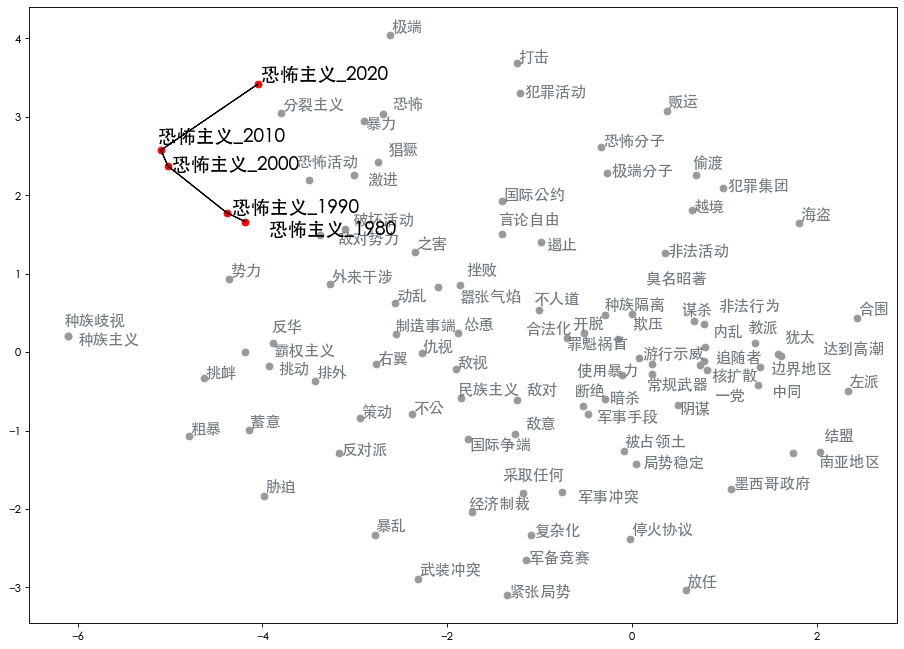

In [91]:
X = np.array(fortsne)

X_embedded = TSNE(n_components=n_components, random_state=random_state, metric=metric, learning_rate=learning_rate).fit_transform(X)

df = pd.DataFrame(X_embedded)

df2 = df.iloc[:-len(yearstocompare)]
df3 = df.iloc[-len(yearstocompare):]

df3 = df3.reset_index()

newvocab1 = newvocab[:-len(yearstocompare)]
newvocab1
newvocab2 = newvocab[-len(yearstocompare):]
newvocab2

x = df2[0] 
y = df2[1]
x2 = df3[0]
y2 = df3[1]

# just some size adjustment...
fig, ax = plt.subplots(1, figsize=(14,10),dpi=80,facecolor='#ffffff')
ax.set_facecolor('#ffffff')

# plot x and y
plt.scatter(x,y,c="0.6")
plt.rcParams['font.family'] = ['Heiti TC']

textsvocab = [plt.text(x[i], y[i], txt,color='#71797E',fontsize = 14) for i,txt in enumerate(newvocab1)]
adjust_text(textsvocab)

plt.scatter(x2,y2,c="red")

textsvocab2 = [plt.text(x2[i], y2[i], txt,color='black',fontsize = 17) for i,txt in enumerate(newvocab2)]
adjust_text(textsvocab2)

def drawArrow(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1], head_width=0.01, length_includes_head=True,color='black')

for i in range(1,len(yearstocompare)):
    X = np.array([x2[len(x2)-i],y2[len(y2)-i]])
    Y = np.array([x2[len(x2)-(i+1)],y2[len(y2)-(i+1)]])
    drawArrow(Y,X)

#show the plot
# plt.savefig(f'{keyword}.png')
plt.show()